## Bloque 1: Configuración del problema

Primero, definimos nuestra "montaña". El error depende del peso $w_1$. En nuestro ejemplo, queremos que la salida sea $0$ cuando la entrada es $1$.

Nuestra red minúscula cuenta con **1 entrada**, **1 neurona oculta** y **1 salida**.

El peso de la neurona de salida es fijo (para simplificar el ejemplo).

In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# Datos del ejemplo
x = 1          # Entrada
target = 0     # Lo que queremos obtener
w2 = 0.8       # Segundo peso (fijo para simplificar)
lr = 2.5       # Learning Rate (paso del arquero)

In [78]:
# Función para calcular el error según el peso w1
def calcular_error(w1):
    # Forward Pass
    capa_oculta = x * w1
    activacion = max(0, capa_oculta) # ReLU
    prediccion = activacion * w2
    # Error Cuadrático Medio (simplificado para 1 dato)
    return 0.5 * (prediccion - target)**2

In [79]:
# Generamos valores para dibujar la "montaña"
pesos_posibles = np.linspace(-1, 1, 100)
errores = [calcular_error(w) for w in pesos_posibles]

## Bloque 2: Aplicando Backpropagation

Aquí es donde ocurre la magia. Calculamos la "pendiente" del terreno en el punto donde está nuestro peso actual ($w_1 = 0.5$) y lo que sucede en las siguientes iteraciones.

In [80]:
# --- ENTRENAMIENTO EN BUCLE ---

w1_actual = 0.5  # Volvemos al punto de inicio
historial_pesos = [w1_actual]
historial_errores = [calcular_error(w1_actual)]

iteraciones = 10

for i in range(iteraciones):
    # 1. Forward Pass
    pred = (w1_actual * x) * w2

    # 2. Backpropagation (Calculamos el gradiente actual)
    d_error = (pred - target)
    d_pred = w2
    d_activacion = x
    gradiente = d_error * d_pred * d_activacion

    # 3. Actualización (Descenso por Gradiente)
    w1_actual = w1_actual - (lr * gradiente)

    # Guardamos para la gráfica
    historial_pesos.append(w1_actual)
    historial_errores.append(calcular_error(w1_actual))

    print(f"Iteración {i+1}: Peso = {w1_actual:.4f} | Error = {historial_errores[-1]:.4f}")

Iteración 1: Peso = -0.3000 | Error = 0.0000
Iteración 2: Peso = 0.1800 | Error = 0.0104
Iteración 3: Peso = -0.1080 | Error = 0.0000
Iteración 4: Peso = 0.0648 | Error = 0.0013
Iteración 5: Peso = -0.0389 | Error = 0.0000
Iteración 6: Peso = 0.0233 | Error = 0.0002
Iteración 7: Peso = -0.0140 | Error = 0.0000
Iteración 8: Peso = 0.0084 | Error = 0.0000
Iteración 9: Peso = -0.0050 | Error = 0.0000
Iteración 10: Peso = 0.0030 | Error = 0.0000


# Bloque 3: Visualización 🎨
Finalmente, mostramos cómo el peso ha "bajado" por la curva del error.

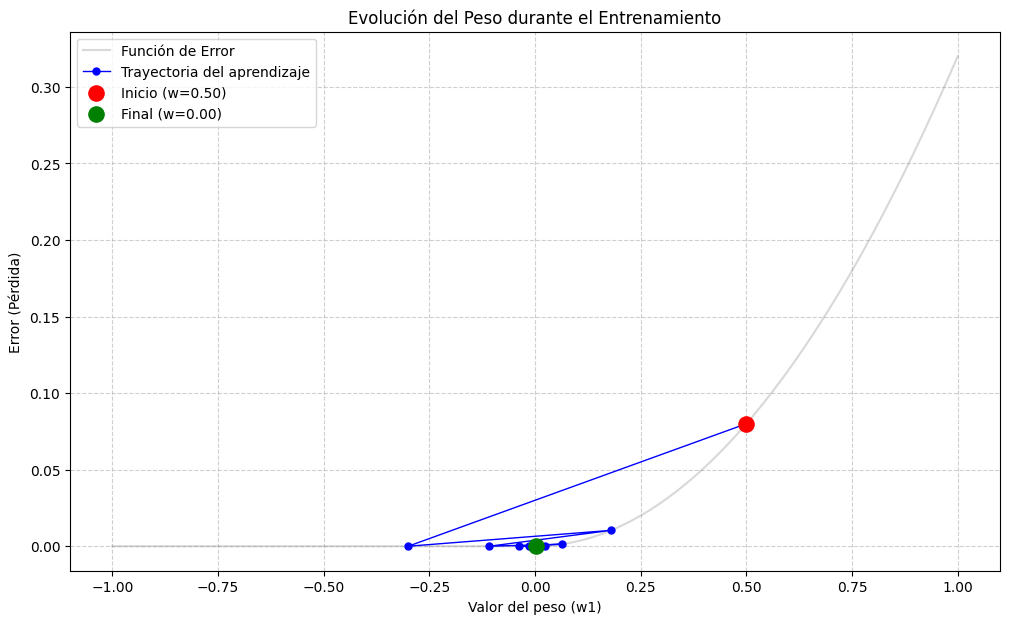

In [81]:
# --- VISUALIZACIÓN DEL DESCENSO ---

plt.figure(figsize=(12, 7))

# 1. Dibujamos la "montaña" (curva de error)
plt.plot(pesos_posibles, errores, color='gray', alpha=0.3, label='Función de Error')

# 2. Dibujamos el camino recorrido (la trayectoria)
plt.plot(historial_pesos, historial_errores, 'o-', color='blue',
         markersize=5, linewidth=1, label='Trayectoria del aprendizaje')

# 3. Destacamos el inicio y el final
plt.scatter(historial_pesos[0], historial_errores[0], color='red', s=120,
            zorder=5, label=f'Inicio (w={historial_pesos[0]:.2f})')
plt.scatter(historial_pesos[-1], historial_errores[-1], color='green', s=120,
            zorder=5, label=f'Final (w={historial_pesos[-1]:.2f})')

# Añadimos detalles para que se entienda mejor
plt.title('Evolución del Peso durante el Entrenamiento')
plt.xlabel('Valor del peso (w1)')
plt.ylabel('Error (Pérdida)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()